In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data = '/content/drive/My Drive/Evening_Data_NER.csv'
labeldata = '/content/drive/My Drive/EveningDataset500.xlsx'

Mounted at /content/drive


In [ ]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr
# Load the dataset
df = pd.read_csv(data)

# Check if the dataset is loaded
df

,Unnamed: 0,uid,startTime,record,evening_sentiment,evening_sent_score,text_ner
0,0,96171,2024-02-19T06:31:13.055000+00:00,evening,positive,0.981025,Dinner was great [Named Entity] and [Named Ent...
1,1,108250,2024-02-19T06:13:01.482000+00:00,evening,positive,0.643842,Got a bit organized\nGot most packing done for...
2,2,72326,2024-02-19T04:26:38.391000+00:00,evening,neutral,0.752069,Read
3,3,100833,2024-02-19T04:02:26.924000+00:00,evening,neutral,0.758205,Self care. \nResting\nTalking with [Named Enti...
4,4,107671,2024-02-19T04:00:17.205000+00:00,evening,positive,0.986966,It was a good day spending time with [Named En...
...,...,...,...,...,...,...,...
28148,35346,109892,2024-03-18T04:24:06.104000+00:00,evening,neutral,0.817701,I took on the weeds in the front yard. \nTurne...
28149,35347,78719,2024-03-18T04:36:12.053000+00:00,evening,positive,0.700482,I walked to get coffee\nI had a positive conve...
28150,35349,110843,2024-03-18T07:15:47.691000+00:00,evening,positive,0.901131,Had some good [Named Entity] food. \nNo fighti...
28151,35350,110563,2024-03-18T08:25:05.487000+00:00,evening,positive,0.913498,I slept good\nI went to smart recovery meeting...


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Basic Information about the dataset
print("Basic Information about the dataset")
print(df.info())
print("\n")

Basic Information about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28153 entries, 0 to 28152
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          28153 non-null  int64  
 1   uid                 28153 non-null  int64  
 2   startTime           28153 non-null  object 
 3   record              28153 non-null  object 
 4   evening_sentiment   28152 non-null  object 
 5   evening_sent_score  28152 non-null  float64
 6   text_ner            28091 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.5+ MB
None




In [ ]:
# 2. Descriptive Statistics
print("Descriptive Statistics of Numerical Columns")
print(df.describe())
print("\n")

Descriptive Statistics of Numerical Columns
         Unnamed: 0            uid  evening_sent_score
count  28153.000000   28153.000000        28152.000000
mean   17737.009768   61078.251092            0.806736
std    10309.603992   33716.648391            0.148621
min        0.000000    1851.000000            0.349033
25%     8670.000000   30092.000000            0.701391
50%    17878.000000   54273.000000            0.846188
75%    26833.000000   91343.000000            0.934692
max    35351.000000  121146.000000            0.990979




In [ ]:
# 3. Checking for missing values
print("Checking for Missing Values")
print(df.isnull().sum())
print("\n")

Checking for Missing Values
Unnamed: 0             0
uid                    0
startTime              0
record                 0
evening_sentiment      1
evening_sent_score     1
text_ner              62
dtype: int64




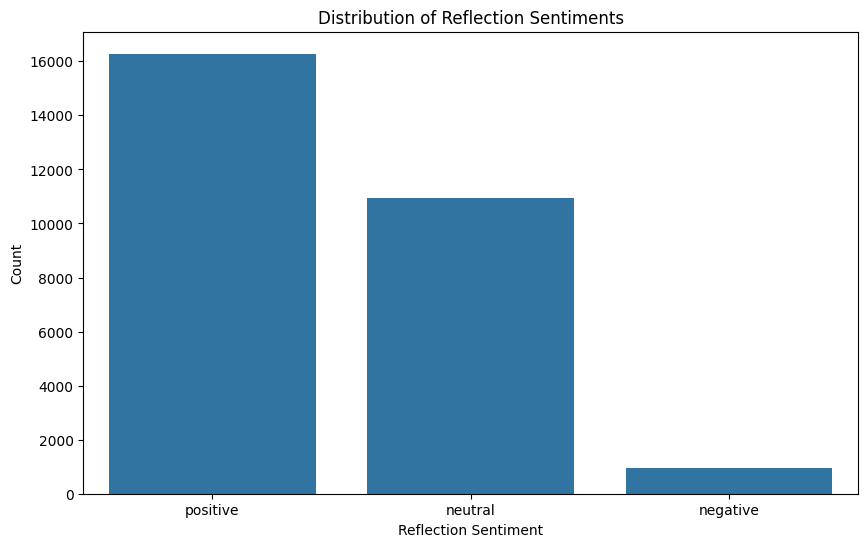

In [ ]:
# 4. Distribution of reflection sentiments
plt.figure(figsize=(10, 6))
sns.countplot(x='evening_sentiment', data=df)
plt.title('Distribution of Reflection Sentiments')
plt.xlabel('Reflection Sentiment')
plt.ylabel('Count')
plt.show()

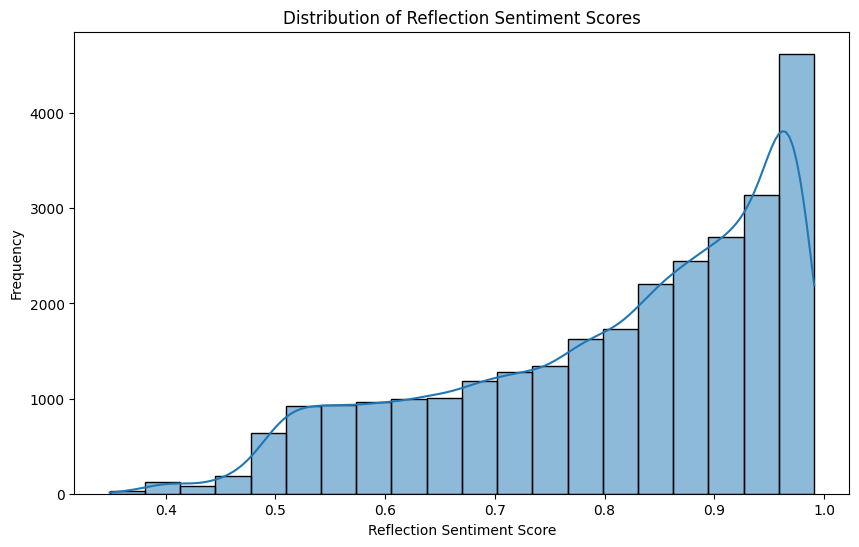

In [ ]:
# 5. Analyzing Reflection Sentiment Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['evening_sent_score'], bins=20, kde=True)
plt.title('Distribution of Reflection Sentiment Scores')
plt.xlabel('Reflection Sentiment Score')
plt.ylabel('Frequency')
plt.show()

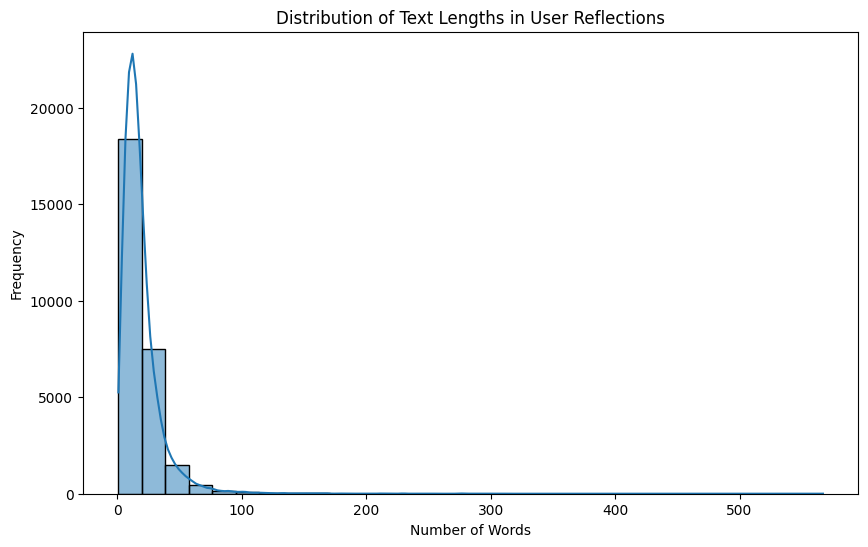

In [ ]:
# 6. Length of the text in the 'record' column (number of words)
df['text_length'] = df['text_ner'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Lengths in User Reflections')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

<ipython-input-11-1f05f2912fb3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=df, palette='coolwarm')  # 'coolwarm' provides a color gradient


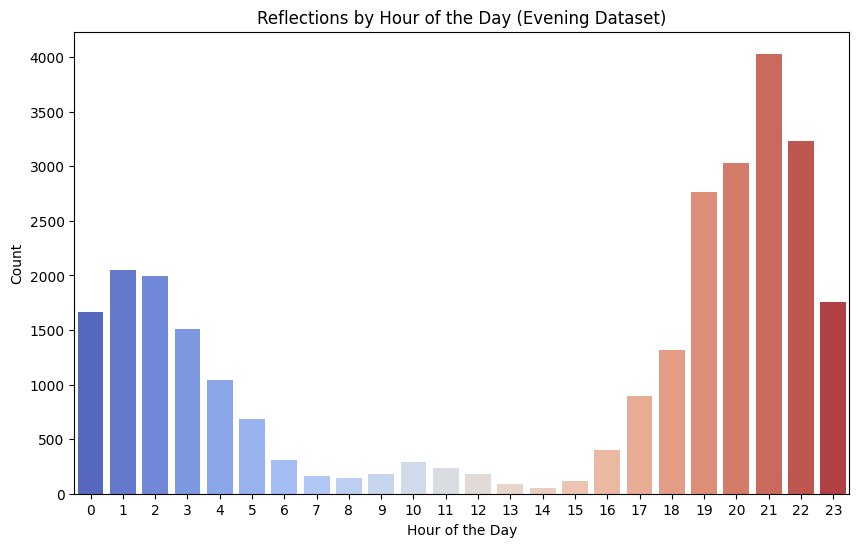

In [ ]:
# 8. Time-based analysis
df['startTime'] = pd.to_datetime(df['startTime'])  # Convert 'startTime' to datetime format
df['hour'] = df['startTime'].dt.hour  # Extract the hour
plt.figure(figsize=(10, 6))

# Create a count plot with a color palette that changes based on count
sns.countplot(x='hour', data=df, palette='coolwarm')  # 'coolwarm' provides a color gradient

plt.title('Reflections by Hour of the Day (Evening Dataset)')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()


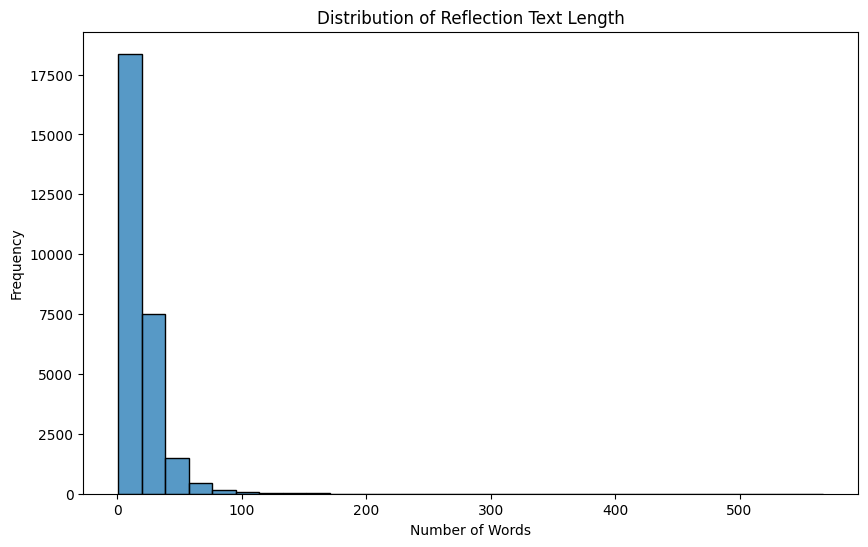

count    28153.000000
mean        19.094129
std         17.196056
min          1.000000
25%          9.000000
50%         15.000000
75%         23.000000
max        567.000000
Name: text_length, dtype: float64


In [ ]:
# Add text length column (if not already calculated)
df['text_length'] = df['text_ner'].apply(lambda x: len(str(x).split()))

# Plot the distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=False)
plt.title('Distribution of Reflection Text Length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Summary statistics for text lengths
print(df['text_length'].describe())


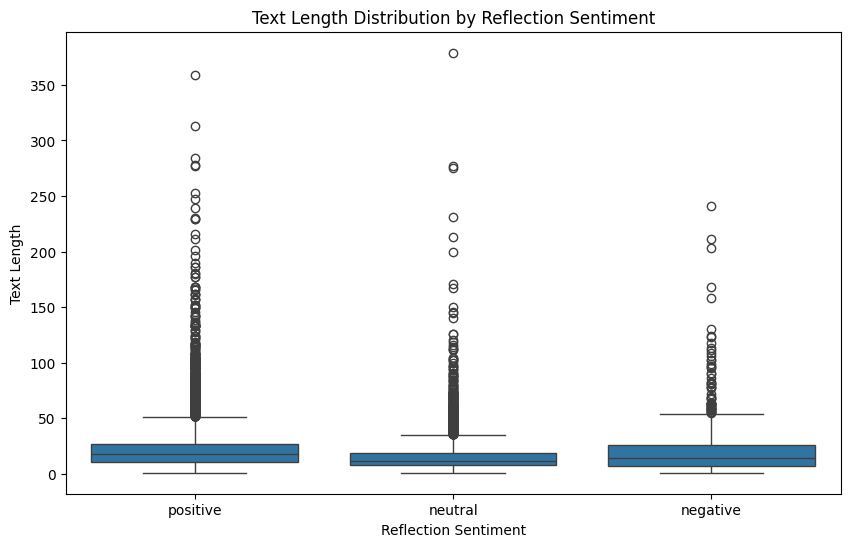

In [ ]:
# Boxplot of text length by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='evening_sentiment', y='text_length', data=df)
plt.title('Text Length Distribution by Reflection Sentiment')
plt.xlabel('Reflection Sentiment')
plt.ylabel('Text Length')
plt.show()


In [ ]:
# Longest reflections
longest_reflections = df.nlargest(5, 'text_length')[['text_ner', 'text_length']]
print("Longest Reflections:")
print(longest_reflections)

# Shortest reflections
shortest_reflections = df.nsmallest(5, 'text_length')[['text_ner', 'text_length']]
print("\nShortest Reflections:")
print(shortest_reflections)


Longest Reflections:
                                                text_ner  text_length
11530  Today was tough. Lots of tears. I watched the ...          567
7530   Today was a very busy day starting from 9 o’cl...          379
6854   Today was a fun day. Went over to [Named Entit...          359
7587   [Named Entity] “Be A Better Me 2023” Goal Chal...          313
7473   Teatime went pretty well I took my neighbor to...          284

Shortest Reflections:
      text_ner  text_length
2        Read             1
95         Sun            1
444       Good            1
487        NaN            1
631  Neighbors            1


#Perform EDA on Labeled Evening Dataset


In [ ]:
df1 = pd.read_excel(labeldata)

# Overview of the dataset
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.1        500 non-null    int64  
 1   Unnamed: 0          500 non-null    int64  
 2   uid                 500 non-null    int64  
 3   startTime           500 non-null    object 
 4   record              500 non-null    object 
 5   evening_sentiment   500 non-null    object 
 6   evening_sent_score  500 non-null    float64
 7   text_ner            498 non-null    object 
 8   final_label         464 non-null    object 
 9   Adaptive            90 non-null     object 
dtypes: float64(1), int64(3), object(6)
memory usage: 39.2+ KB
None


In [ ]:
df1

,Unnamed: 0.1,Unnamed: 0,uid,startTime,record,evening_sentiment,evening_sent_score,text_ner,final_label,Adaptive
0,1,18582,41327,2022-04-02T00:02:52.451000+00:00,evening,neutral,0.691588,Talked to [Named Entity]\nHad [Named Entity] f...,Cognitive Change,NaN
1,2,1686,98269,2023-12-13T03:26:10.324000+00:00,evening,neutral,0.590814,[Named Entity] [Named Entity]Resources for hea...,NaN,NaN
2,3,20115,35133,2022-02-26T03:07:26.958000+00:00,evening,neutral,0.890486,Connecting with [Named Entity] sometimes,NaN,NaN
3,4,6334,48538,2023-05-26T23:19:36.267000+00:00,evening,neutral,0.916070,[Named Entity] [Named Entity] [Named Entity]Lu...,NaN,NaN
4,5,31845,116521,2024-05-27T10:36:08.475000+00:00,evening,positive,0.976836,Present for [Named Entity] he really appreciat...,Situation Modification,NaN
...,...,...,...,...,...,...,...,...,...,...
495,496,27388,14925,2021-07-08T19:00:10.490000+00:00,evening,neutral,0.774198,Walking at church/temple with [Named Entity]\n...,Attentional Deployment,adaptive
496,497,27390,16242,2021-07-08T18:51:54.674000+00:00,evening,positive,0.809444,walk with [Named Entity] [Named Entity] \n[Nam...,Attentional Deployment,adaptive
497,498,27391,14655,2021-07-08T18:20:39.068000+00:00,evening,neutral,0.771144,[Named Entity] calling me for a catch up.\nPla...,Attentional Deployment,adaptive
498,499,28055,110383,2024-03-19T22:35:44.711000+00:00,evening,neutral,0.878600,Homegroup game\nWalk in the woods\nTeaching,Attentional Deployment,adaptive


In [ ]:
print(df1.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'uid', 'startTime', 'record',
       'evening_sentiment', 'evening_sent_score', 'text_ner', 'final_label',
       'Adaptive'],
      dtype='object')


In [ ]:
df1.columns = df1.columns.str.strip()

In [ ]:
# Summary statistics for numerical columns
print(df1.describe())

       Unnamed: 0.1    Unnamed: 0            uid  evening_sent_score
count    500.000000    500.000000     500.000000          500.000000
mean     250.500000  16203.734000   63471.178000            0.799354
std      144.481833  10782.153728   33884.130549            0.148214
min        1.000000    116.000000    7325.000000            0.401299
25%      125.750000   6161.250000   30027.000000            0.690568
50%      250.500000  15512.000000   66164.000000            0.829265
75%      375.250000  25945.000000   92376.000000            0.933042
max      500.000000  35312.000000  120933.000000            0.990979


In [ ]:
# Check for missing values
print(df1.isnull().sum())

Unnamed: 0.1            0
Unnamed: 0              0
uid                     0
startTime               0
record                  0
evening_sentiment       0
evening_sent_score      0
text_ner                2
final_label            36
Adaptive              410
dtype: int64


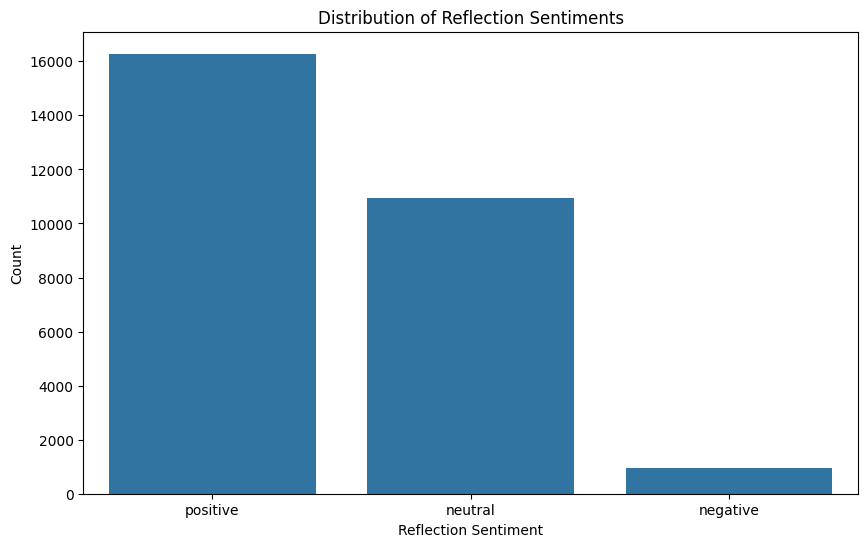

In [ ]:
# 4. Distribution of evening sentiments
plt.figure(figsize=(10, 6))
sns.countplot(x='evening_sentiment', data=df)
plt.title('Distribution of Reflection Sentiments')
plt.xlabel('Reflection Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df1['er_labels'] = df1['final_label'].apply(
        lambda x: [label.strip() for label in x.split(",")] if pd.notna(x) else ["None"]
    )
# Prepare label binarizer
mlb = MultiLabelBinarizer()
y_labels = mlb.fit_transform(df1['er_labels'])
label_classes = mlb.classes_

print(label_classes)


['Attentional Deployment' 'Cognitive Change' 'None' 'Response Modulation'
 'Situation Modification' 'Situation Selection']


<ipython-input-22-b1147d51e992>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


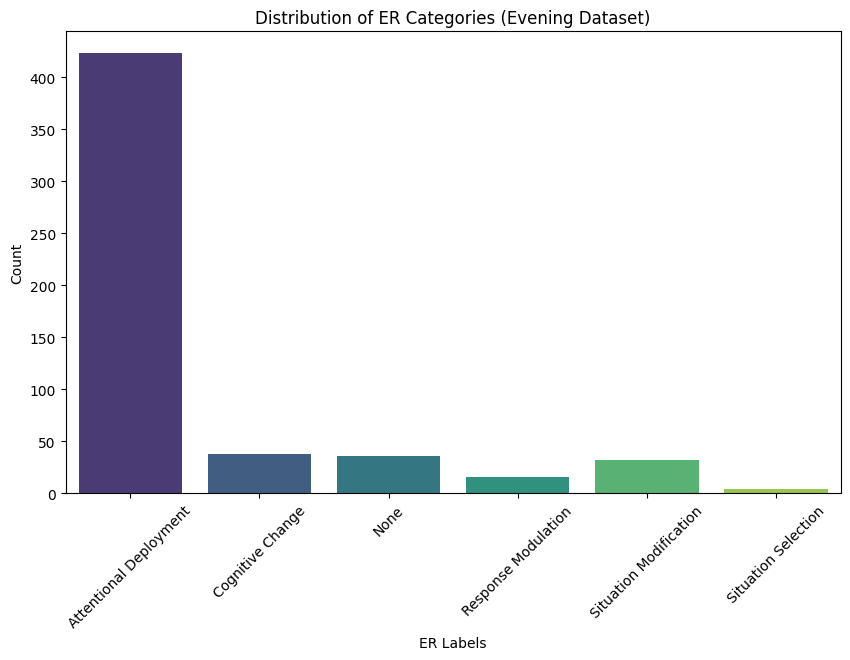

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer

# Count occurrences of each category
label_counts = pd.DataFrame(y_labels, columns=label_classes).sum()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.title('Distribution of ER Categories (Evening Dataset)')
plt.xlabel('ER Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(df1['Adaptive'].unique())

[nan 'adaptive' 'adaptive ' 'maladaptive']


In [ ]:
df1['Adaptive'] = df1['Adaptive'].str.strip().str.lower()  # Remove any extra spaces and convert to lowercase

<ipython-input-27-3f9d1fef8c2e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Adaptive', data=df1, palette="viridis")  # Count occurrences of 'Adaptive' and 'Maladaptive'


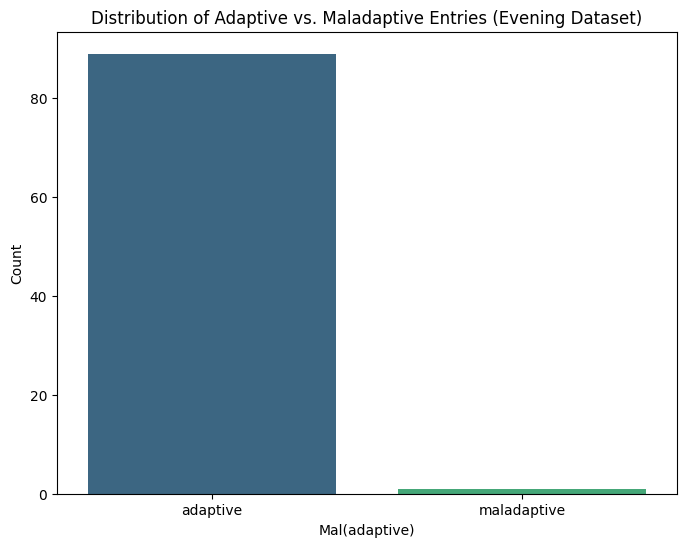

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Adaptive' column contains values like 'Adaptive' and 'Maladaptive'
plt.figure(figsize=(8, 6))
sns.countplot(x='Adaptive', data=df1, palette="viridis")  # Count occurrences of 'Adaptive' and 'Maladaptive'
plt.title('Distribution of Adaptive vs. Maladaptive Entries (Evening Dataset)')
plt.xlabel('Mal(adaptive)')
plt.ylabel('Count')
plt.show()